In [65]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Motivating Example

- In the last lesson, we discussed computing the PDF of the random variable $S_n = X_1 + X_2 + ... X_n$, where all $X_i$ are independent of each other

- This was a truly terrible experience, because (i) we need to recompute convolutions every time we add a new random variable to the sum, and (ii) computing convolutions is not easy
    - If you need to be convinced of (ii) again, re-do Exercise 45 Q2

- IRL, we work with hundreds of thousands of random variables, so it is exceedingly impractical to work with convolutions; we need an approximation that is accurate and easy to use.
    - This is where the **Central Limit Theorem** comes in

## Theory

- **Theorem 46.1 (Central Limit Theorem of Sums)**: Let $X_1, X_2, ... X_n$ be independent and identically distributed (i.i.d) random variables. Then, if $n$ is large, the sum $S_n = X_1 + X_2 + ... X_n$ is approximately normally distributed
    - $$\begin{align}
        \mu &= E[S_n] \\
        &= E[X_1 + X_2 + ... X_n] \\
        &= E[X_1] + E[X_2] + ... E[X_n] & \text{Linearity of expectation} \\
        &= n \cdot E[X_1] & \text{i.i.d.} 
        \end{align}$$
    - $$\begin{align}
        \sigma^2 &= Var[S_n] \\
        &= Cov[S_n, S_n] \\
        &= Cov[X_1 + X_2 + ... X_n, X_1 + X_2 + ... X_n] \\
        &= \sum_{i = j} Cov[X_i, X_j] + \sum_{i \neq j} Cov[X_i, X_j] \\
        &= \sum_{i = j} Cov[X_i, X_j] & Cov[X_i, X_j] = 0 \text{ if } i \neq j \\
        &= n \cdot Cov[X_i, X_i] \\
        &= n \cdot Var[X_1] 
        \end{align}$$
    - $$\begin{align}
        SD[S_n] &= \sqrt{Var[S_n]} \\
        &= \sqrt{n} \cdot SD[X_1] 
        \end{align}$$

- **Theorem 46.2 (Central Limit Theorem of Means)**: Let $X_1, X_2, ... X_n$ be independent and identically distributed (i.i.d) random variables. Then, if $n$ is large, the mean $\bar{X_n} = \frac{X_1 + X_2 + ... X_n}{n}$ is approximately normally distributed
    - $$\begin{align}
        \mu &= E[\bar{X_n}] \\
        &= E[\frac{S_n}{n}] \\
        &= \frac{1}{n} \cdot E[S_n] \\
        &= \frac{1}{n} \cdot n \cdot E[X_1] \\
        &= E[X_1] \\
        \end{align}$$
    - $$\begin{align}
        \sigma^2 &= Var[\bar{X_n}] \\
        &= Var[\frac{S_n}{n}] \\
        &= \frac{1}{n^2} Var[S_n] \\
        &= \frac{1}{n^2} \cdot n \cdot Var[X_1] \\
        &= \frac{Var[X_1]}{n} \\
        \end{align}$$
    - $$\begin{align}
        SD[\bar{X_n}] &= \sqrt{Var[\bar{X_n}]} \\
        &= \sqrt{\frac{Var[X_1]}{n}} \\
        &= \frac{SD[X_1]}{\sqrt{n}} \\
        \end{align}$$


- Let's think through what this actually means
    - The random variable $\bar{X_n}$ represents the value of the sample mean with $n$ observations
    - All we are saying is that the expectation of the sample mean will be the same as the expectation for each same
    - As we get more samples (i.e. as $n$ increases), the standard deviation of $\bar{X_n}$ decreases
        - This means that we get less uncertain about the sample mean as we increase the sample size!

## Worked examples

### Example 46.1

- Since the 1200s, coins struck by the Royal Mint in England have been evaluated for their metal content in a ceremony called the Trial of the Pyx. This ceremony does not have much meaning today (see the video below), but in the 1700s, English coins were made of gold. The Master of the Mint had an incentive to make coins weigh less than the standard, because he could keep the shortfall himself (as long as he was not caught). In the Trial, 100 guineas (i.e., gold coins) would be chosen randomly and independently from all coins made at the Mint that year, put in the Pyx (a ceremonial box), and weighed. The Master of the Mint was allowed a margin of error, which was set according to the manufacturing tolerances of the time. If the actual weight of the coins in the Pyx differed from its target weight by more than this margin on either side, the Master of the Mint was exposed to serious penalties. In 1799, each guinea was supposed to weigh 128 grains. Due to manufacturing variability, the standard deviation of guinea weights was about 0.1 grains. To give the Master of the Mint some wiggle room, the allowable margin of error for each guinea was set at 0.32 grains. The British government reasoned that the total weight of 100 guineas should be 12,800 grains on average, with an allowable margin of 32 grains. Let’s suppose the Master of the Mint makes the guineas weigh 127.7 grains on average, and skims 0.1 grains from each coin. What is the probability he gets caught?

    - Summarising information
        - Let the weight of the 100 coins be $W$
        - From the question, $W \sim \text{Normal}(\mu = 127.7*100 = 12770, \sigma = 0.1^2 * 100 = 1)$ by C.L.T
        - $$\begin{align}
            P(W < 12800-32) &= P(W < 12768) \\
            &= P(Z < \frac{12768 - 12770}{1}) \\
            &= P(Z < \frac{12768 - 12770}{1}) \\
            &= P(Z < -2) \\
            &= 0.023
            \end{align}$$

In [4]:
scipy.stats.norm.cdf(-2)

0.022750131948179195

### Example 46.2

-  Not satisfied with a 1-in-50 chance of being caught (and likely executed), the Master of the Mint wants to reduce his chances of getting caught to 0.1%? What should he make the guineas weigh on average?
    - We want $x$ such that $P(W < x) = 0.001$
    - $$\begin{align}
        P(W < w) &= 0.001 \\
        P(Z < \frac{w - 12770}{1}) &= 0.001 \\
        \text{Solving via scipy below, CDF of } Z &= 0.001 \text{ when } x = -3.090 \\
        \frac{w - 12770}{1} &= -3.09 \\
        w = 12766.91
        \frac{w}{n} = 127.67
        \end{align}$$

- How is it possible that, at the govt mandated margin of 32g, the probability of getting caught is so low?
    - Notice that the uncertainty associated with the variance of the sum $SD[W] = \sqrt{n} SD[X]$
    - So at a 100 coins, the standard deviation of $W$ is $10 * 0.32 = 3.2$, which is 10x lower than the allowed margin at $32$
        - i.e. 12800 +- 3.2, not 12800 +- 32
    - If the margin was 3.2, probability of getting caught is:
        - $$\begin{align}
            P(W < 12800 - 3.2) &= P(W < 12796.8) \\
            &= P(Z < \frac{12796.8 - 12770}{1}) \\
            &= P(Z < 26.78) \\
            &= 1
            \end{align}$$
    - Let's say the master wants to pass the more stringent test with at least 999/1000 times. He needs to adjust the mean weight to do so (assume the production process is fixed, so SD can't change). What should the new $\mu_w$ be?
        - $$\begin{align}
            P(W < 12796.8) &= 0.001 \\
            P(Z < \frac{12796.8 - \mu_w}{1}) &= 0.001 \\
            \text{Solving via scipy below, CDF of } Z &= 0.001 \text{ when } x = -3.090 \\
            \frac{12796.8 - \mu_w}{1} &= -3.09 \\
            \mu_w = 12799.89 \\
            \frac{w}{n} = 127.999 
            \end{align}$$

In [ ]:
scipy.stats.norm.ppf(0.001)
12800 - 12766.91
12800 - 3.2
12796.8 - 12770
scipy.stats.norm.cdf(26.78)
12796.8+ 3.09

12799.89

### Example 46.3

- Suppose salaries at a very large corporation have a mean of $62,000 and a standard deviation of $32,000. If a single employee is randomly selected, what is the probability their salary exceeds $66,000? If 100 employees are randomly selected, what is the probability their average salary exceeds $66,000?
    - For a single employee, without knowing the underlying distribution, we cannot conclude what the probability is for a given value. 
    - However, if we are randomly selecting 100 employees, the average salary $S$ follows a normal distribution by CLT. $S \sim \text{Normal}(\mu=62000, \sigma = \frac{32000}{\sqrt{100}})$
    - $$\begin{align}
        P(S > 66000) &= P(Z > \frac{66000-62000}{3200}) \\
        &= P(Z > 1.25) \\
        &= 1 - P(Z \le 1.25) \\
        &= 1 - 0.894 \\
        &= 0.106 \\
        \end{align}

In [17]:
print(4000/3200)
print(scipy.stats.norm.cdf(1.25))
print(1 - scipy.stats.norm.cdf(1.25))

1.25
0.8943502263331446
0.10564977366685535


### Example 46.4

- The Central Limit Theorem works for discrete random variables as well. For example, suppose a casino suspects that one of its roulette wheels is defective. They notice that the ball has landed in the 0 or 00 pockets 22 times in the last 300 spins. Is this evidence that the roulette wheel is biased towards 0 and 00?

- Let's solve using binomial first

In [22]:
roulette = scipy.stats.binom(n=300, p = 2/38)

## What is the probability of less than 22 0 & 00 outcomes in 300 spins?
1 - roulette.cdf(21)

0.07497808822239194

- Next, let's solve using CLT
    - Let $S$ be a random variable that is 1 when a spin lands on `0` or `00`, and 0 otherwise
    - $S = X_1 + X_2 + ... X_{300}$
    - By normal approximation:
        $S \sim \text{Normal}(\mu = 300 * \frac{2}{38}, \sigma = \sqrt{300 * \frac{2}{38} * \frac{36}{38}})$

    - One confusion you may have with the approximation above might be the formula:
        - From **Theorem 46.1**, shouldn't $\sigma = \sqrt{n} SD[X_1] = \sqrt{300} \sqrt{300 * \frac{2}{38} * \frac{36}{38}}$?
        - This confusion occurs because there is a misunderstanding of the term $SD[X_1]$
            - In the case above, each $X_i$ has $SD[X_1]$. Hence, a sample of multiple $X_i$ terms will give $Var[S_n] = n \cdot Var[X_1]$
            - In the case of a binomial, however, each $Var[X_1]$ is $p \cdot q$
            - Hence, for 300 observations, $Var[X_1]$ is $n \cdot p \cdot q$, which respects the result in **Theorem 46.1**

In [64]:
N = 300
P = 2/38
Q = 1 - P
print(N * P, N * P * Q)

## Find P(count of 0/00 > 22) = 1 - P(count of 0/00 <= 22)
roulette_norm = scipy.stats.norm(loc=N*P, scale=np.sqrt(N*P*Q))
print(1 - roulette_norm.cdf(22))

## With continuity correction
print(1 - roulette_norm.cdf(21.5))

15.789473684210526 14.958448753462605
0.054161500900249515
0.06990512804450799


In [55]:
roulette_draws_binom = np.random.binomial(n=N, p=P, size=100_000)
print(np.mean(roulette_draws), np.var(roulette_draws))

15.8037 15.012546309999998


In [58]:
roulette_draws_normal = np.random.normal(loc = N*P, scale = N*P*Q, size=100_000)
print(np.mean(roulette_draws), np.var(roulette_draws))

15.8037 15.012546309999998


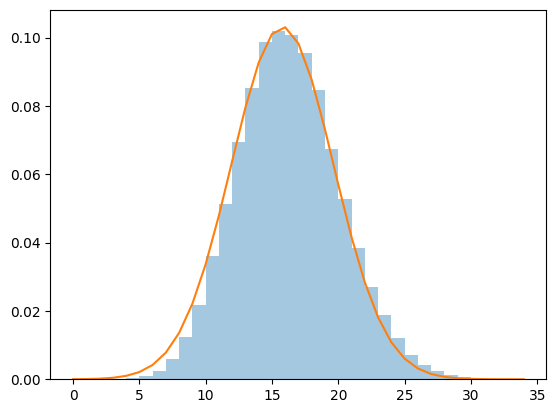

In [79]:
plt.hist(roulette_draws_binom, bins=np.arange(0,35,1), alpha=0.4, density=True);
plt.plot(scipy.stats.norm.pdf(x=np.arange(0,35,1), loc=N*P, scale=np.sqrt(N*P*Q)), alpha=1);
# N*P